# Imports

In [31]:
import tensorflow as tf
import keras
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


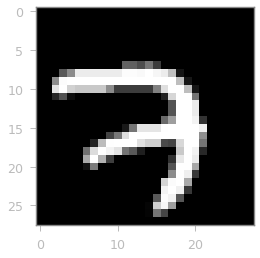

In [32]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

sample_image = mnist.train.images[0].reshape([28,28])
plt.gray()
plt.imshow(sample_image)

# Hyperparameters

In [33]:
# Parameters
learning_rate = 0.01
num_steps = 100
batch_size = 128
display_step = 1

# Network Parameters
n_hidden_1 = 300 # 1st layer number of neurons
n_hidden_2 = 300 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

#Training Parameters
checkpoint_every = 100
checkpoint_dir = 'MLP_MNIST/runs/'

# Save intermediate files

In [34]:
checkpoint_dir = os.path.abspath(os.path.join(checkpoint_dir, "checkpoints"))
checkpoint_prefix = os.path.join(checkpoint_dir, "model")
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# We only keep the last 2 checkpoints to manage storage
saver = tf.compat.v1.train.Saver(tf.global_variables(), max_to_keep=2)

# Model definition

## Input data, labels, weights and biases

In [35]:
X = tf.compat.v1.placeholder("float", [None, num_input],name="input_x")
Y = tf.compat.v1.placeholder("float", [None, num_classes],name="input_y")

weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

## Layers

In [36]:
layer_1 = tf.add(tf.matmul(X, weights['h1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
logits = tf.matmul(layer_2, weights['out']) + biases['out']

prediction = tf.nn.softmax(logits, name='prediction')

## Cost function and optimizer

In [37]:
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

## Evaluate model

In [38]:
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32) ,name='accuracy')

# Train model

In [45]:
# Initialize the variables
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:
    # Run the initializer
    sess.run(init)
    loss_list = []
    
    for step in range(1, num_steps + 1): # Extracting
        batch_x, batch_y = mnist.train.next_batch(batch_size) # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x, Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + "{:.4f}".format(loss) + ", Training Accuracy= " + "{:.3f}".format(acc))
            loss_list.append(loss)

        if step % checkpoint_every == 0:
            path = saver.save(sess, checkpoint_prefix, global_step=step)
            print("Saved model checkpoint to {}\n".format(path))

    print("Optimization Finished!")

# Calculate accuracy for MNIST test images
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

Step 1, Minibatch Loss= 2641.4463, Training Accuracy= 0.172
Step 2, Minibatch Loss= 2397.6394, Training Accuracy= 0.227
Step 3, Minibatch Loss= 1970.8567, Training Accuracy= 0.258
Step 4, Minibatch Loss= 1662.8403, Training Accuracy= 0.383
Step 5, Minibatch Loss= 1549.8661, Training Accuracy= 0.461
Step 6, Minibatch Loss= 977.3090, Training Accuracy= 0.477
Step 7, Minibatch Loss= 654.4856, Training Accuracy= 0.625
Step 8, Minibatch Loss= 636.1791, Training Accuracy= 0.625
Step 9, Minibatch Loss= 545.1318, Training Accuracy= 0.750
Step 10, Minibatch Loss= 618.2552, Training Accuracy= 0.672
Step 11, Minibatch Loss= 522.2915, Training Accuracy= 0.711
Step 12, Minibatch Loss= 586.0571, Training Accuracy= 0.688
Step 13, Minibatch Loss= 380.7880, Training Accuracy= 0.766
Step 14, Minibatch Loss= 604.3204, Training Accuracy= 0.742
Step 15, Minibatch Loss= 791.8601, Training Accuracy= 0.734
Step 16, Minibatch Loss= 582.5093, Training Accuracy= 0.711
Step 17, Minibatch Loss= 466.7696, Training 

## Plot loss

Text(0.5, 1.0, 'Minibatch loss per step')

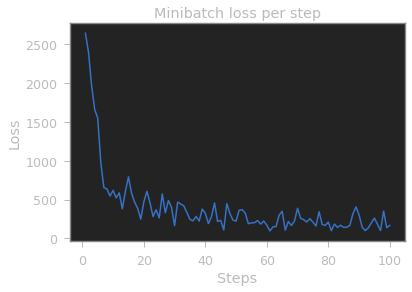

In [48]:
plt.plot(list(range(1, num_steps + 1)), loss_list)
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Minibatch loss per step')

# Building inference

INFO:tensorflow:Restoring parameters from /home/iarizex/HDD/Stalicla/projects/deep_learning/MLP_MNIST/runs/checkpoints/model-100
Predicted digit:  9
Input image:


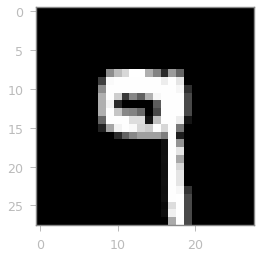

In [71]:
# Pointing the model checkpoint
checkpoint_file = tf.train.latest_checkpoint(checkpoint_dir)
saver = tf.train.import_meta_graph("{}.meta".format(checkpoint_file))

# Load the test data
test_data = np.array([mnist.test.images[6000]])
test_labels = np.array([mnist.test.labels[6000]])

# Load the input variable from the model
input_x = tf.get_default_graph().get_operation_by_name("input_x").outputs[0]

# Load the Prediction operation
prediction = tf.get_default_graph().get_operation_by_name("prediction").outputs[0]

# Clear session
#tf.cl

with tf.Session() as sess:
    # Restore the model from the checkpoint
    saver.restore(sess, checkpoint_file)
    # Execute the model to make predictions
    data = sess.run(prediction, feed_dict={input_x: test_data, prediction: test_labels})
    print("Predicted digit: ", data.argmax())

# Display the feed image
print ("Input image:")
plt.gray()
plt.imshow(test_data.reshape([28,28]))